In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List

# Carregar o arquivo CSV
VREX_PATH = '/home/luiz/repos/tcc_experiments_az_ml/data/vrex.csv'
TRAIN_PATH = '/home/luiz/repos/tcc_experiments_az_ml/data/samples/vrex_encoded_tf_idf_updated_2008_2009_2010_2011_2012_2013_2014_2015_2016_2017_.csv'
TEST_PATH = '/home/luiz/repos/tcc_experiments_az_ml/data/samples/vrex_encoded_tf_idf_updated_2018_2019_2020_2021_.csv'
vrex_df = pd.read_csv(VREX_PATH)
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)


lbl_exploits_has
0    47120
1     1686
Name: count, dtype: int64


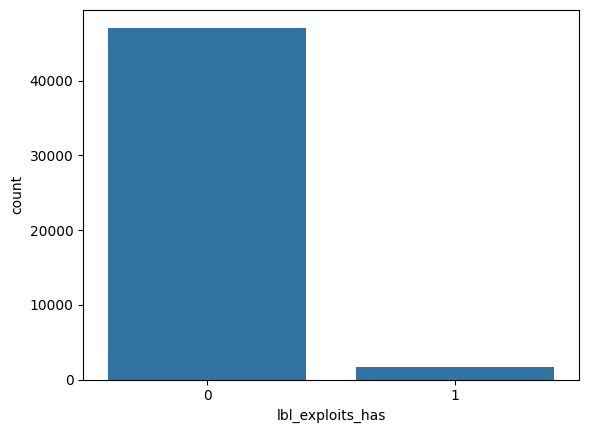

In [12]:
# Contar o número de exemplos em cada classe
class_counts = test_df['lbl_exploits_has'].value_counts()
print(class_counts)

# Visualizar a distribuição de classes
sns.countplot(x='lbl_exploits_has', data=test_df)
plt.show()

lbl_exploits_has
0    68223
1    10497
Name: count, dtype: int64


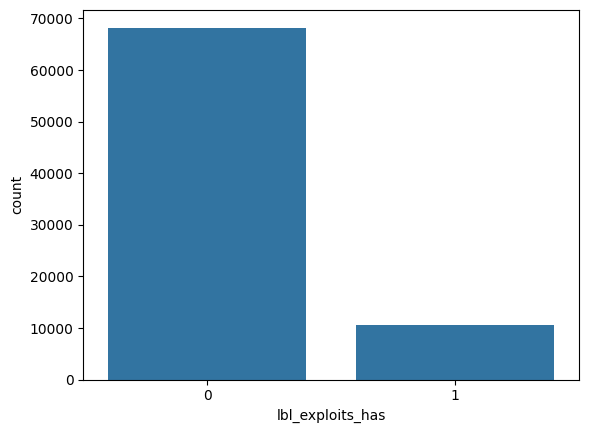

In [13]:
# Contar o número de exemplos em cada classe
class_counts = train_df['lbl_exploits_has'].value_counts()
print(class_counts)

# Visualizar a distribuição de classes
sns.countplot(x='lbl_exploits_has', data=train_df)
plt.show()

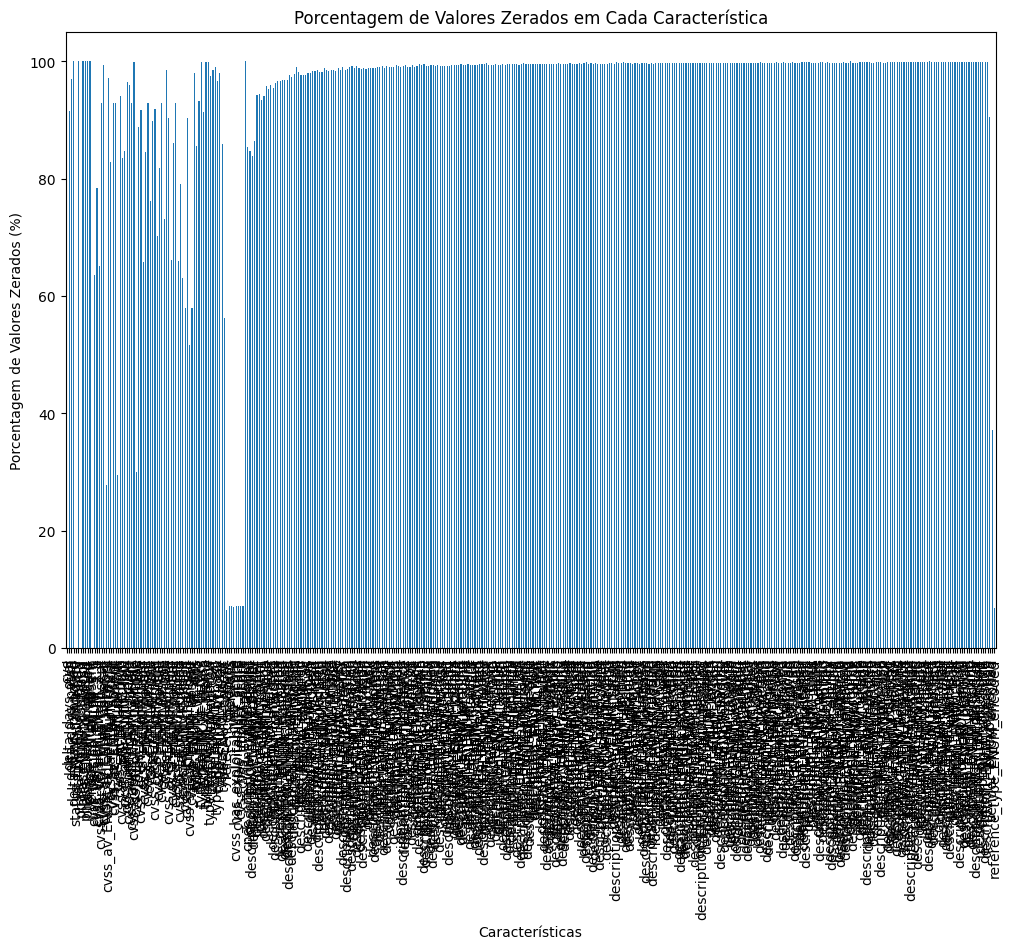

In [14]:
# Concatenar os datasets de treino e teste
df = pd.concat([train_df, test_df])

# Calcular a porcentagem de valores zerados em cada característica
zero_percentage = (df == 0).mean() * 100

# Plotar o gráfico
plt.figure(figsize=(12, 8))
zero_percentage.plot(kind='bar')
plt.xlabel('Características')
plt.ylabel('Porcentagem de Valores Zerados (%)')
plt.title('Porcentagem de Valores Zerados em Cada Característica')
plt.show()

In [17]:
def extract_vendor_features(df: pd.DataFrame, feature_type: str, features_to_maintain: List[str]) -> List[str]:
    return [column_name for column_name in df.columns if feature_type in column_name and column_name not in features_to_maintain]

len(extract_vendor_features(vrex_df, 'vendor_ENUM', ['vendor_ENUM_absent']))




392

In [18]:
def extract_reference_type_features(df: pd.DataFrame, feature_type: str) -> List[str]:
    return [column_name for column_name in df.columns if feature_type in column_name]

len(extract_reference_type_features(vrex_df, 'reference_type_ENUM'))

86